# classy tutorial

##  Part 1. Import classy Package

In [1]:
import classy 

## Part 2.Generate Data Points

Step 1. Determine the number of data points you want. 

In [2]:
data = classy.dg.generator.D(1000) # Here we set the number of data points to be 1000.

Step 2. Determine the pdf_type (probability density function type), here we support linear type or guassian type pdf functions.

In [3]:
# Here is an example for linear type pdf.

if 0:
    pdf_type = 'Linear'
    params = {'k': -0.5, 'b': 1, 'x_right_bound': 5}
    bound = 1

In [4]:
# Here is an example for guassian type pdf.

if 0:
    pdf_type = 'Gaussian'
    params = {'mu': 0, 'sigma': 3, 'x_right_bound': 5}
    bound = 1

Step 3. Employ the Monte Carlo method to generate a set of randomized data points that correspond to the probability density function of your choice. Data would be stored in AnnData data frame.
anndata: https://anndata.readthedocs.io/en/latest/

In [5]:
if 0:
    adata = data.mc(pdf_type, params)

Here we will use the example of polynomial boundary dataset

In [6]:
adata = data.generate_polynomial_boundary_example()

Step 4. Add gaussian noise to your data. You can modified the noise by setting up different parameters.

In [7]:
classy.dg.add_gaussian_noise(adata, loc = 3, noise_direction = 'polar') # Noise sigma 5, along r axis

AnnData object with n_obs × n_vars = 1000 × 2
    obs: 'Classes', 'Labels', 'r', 'theta', 'r_noisy', 'theta_noisy'
    uns: 'n_samples', 'generate_method', 'noise'
    layers: 'data_cartesian', 'noise_data'

Here we also want to transfer polar coordinate system into cartesian coordinate system.

In [8]:
classy.dg.transfer_polar_to_cartesian(adata)

AnnData object with n_obs × n_vars = 1000 × 2
    obs: 'Classes', 'Labels', 'r', 'theta', 'r_noisy', 'theta_noisy', 'x_ori', 'y_ori', 'x_noisy', 'y_noisy'
    uns: 'n_samples', 'generate_method', 'noise'
    layers: 'data_cartesian', 'noise_data', 'data_cartesian_noisy'

## Part 3. Visualize Data

Scatter plot. Let's check the data distribution with/ without noise in cartesian coordinate.

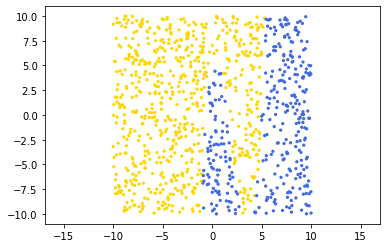

In [9]:
classy.pl.scatt(adata, coordinate = 'cartesian', noise = False) # without noise

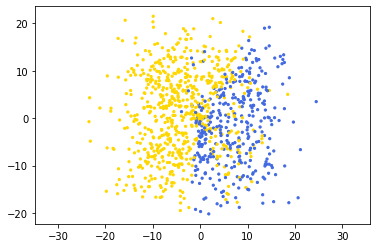

In [10]:
classy.pl.scatt(adata, coordinate = 'cartesian', noise = True)

## Part 3. Perform Classification with Various Classifiers

### Neuron Network

Subdivide the dataset into two distinct partitions, wherein 20% of the data points are assigned for testing purposes, while the remaining 80% are assigned for training purposes.

neuron network evaluation:
Confusion matrix:
 [[ 66   9]
 [ 18 107]]
Accuracy: 0.865
Precision: 0.9224137931034483
Recall: 0.856


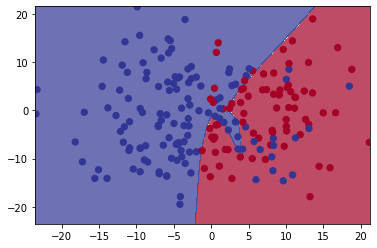

In [11]:
classy.cl.neuron(adata, coordinate = 'cartesian', use_noise = True) # Use noisy data
classy.cl.nn_evaluation(adata) # evaluate model accuracy with noisy data
classy.pl.visualize_nn(adata)

neuron network evaluation:
Confusion matrix:
 [[ 72   4]
 [  0 124]]
Accuracy: 0.98
Precision: 0.96875
Recall: 1.0


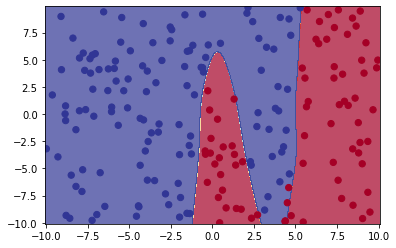

In [12]:
classy.cl.neuron(adata, coordinate = 'cartesian', use_noise = False) # Use data without noise
classy.cl.nn_evaluation(adata) # evaluate model accuracy with noisy data
classy.pl.visualize_nn(adata)

## Part 4. Compare algorithms accuracy across models.

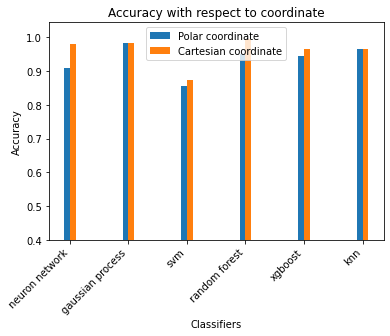

In [15]:
classy.pl.plot_compare_result(adata, factor = 'coordinate', print_evaluation_result = False)